In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
titanic = pd.read_csv('titanic-dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dataset Description

* Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Survival (0 = No; 1 = Yes)
* Name
* Sex
* Age
* sibsp: Number of Siblings/Spouses Aboard
* parch: Number of Parents/Children Aboard
* Ticket Number
* Fare: Passenger Fare (British pound)
* Cabin
* Embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
titanic.shape

(891, 12)

## Exploratiry Data Analysis (EDA)

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for NAN values in dataset

titanic.isna().sum().sum()

866

In [7]:
# NAN values across columns

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Drop un-informative features

titanic.drop('Ticket', axis=1, inplace=True)
titanic.drop('Fare', axis=1, inplace=True),
titanic.drop('Embarked', axis=1, inplace=True),
titanic.drop('Cabin', axis=1, inplace=True)

In [9]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch'],
      dtype='object')

In [10]:
# Convert the 'Sex' feature to binary values

titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [11]:
# Analyse the proportion split of the 'Sex' feature
#0=Male, 1=Female

titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [12]:
# Data shows that 66.6% of the passengers were male.

577/891

0.6475869809203143

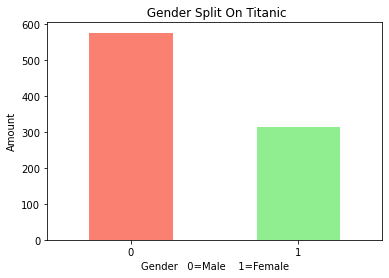

In [13]:
titanic['Sex'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.xticks(rotation=0)
plt.xlabel('Gender   0=Male    1=Female')
plt.ylabel('Amount')
plt.title(' Gender Split On Titanic');

In [44]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0


In [15]:
titanic.drop('Name', axis=1, inplace=True)

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0


In [17]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [18]:
# Fill the NAN values in the 'Age' feature with a mean average value

titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [19]:
titanic['Age'].isna().sum()

0

<AxesSubplot:ylabel='Frequency'>

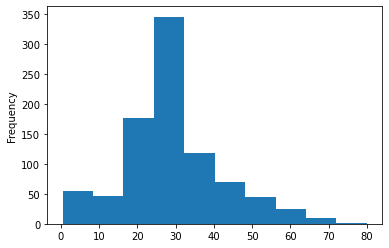

In [20]:
# Analyse the distribution of the 'Age' feature

titanic['Age'].plot.hist()

# Data shows that a large proportion of the passengers were just before the age of 30.

In [21]:
# Look at correlation of columns

titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000


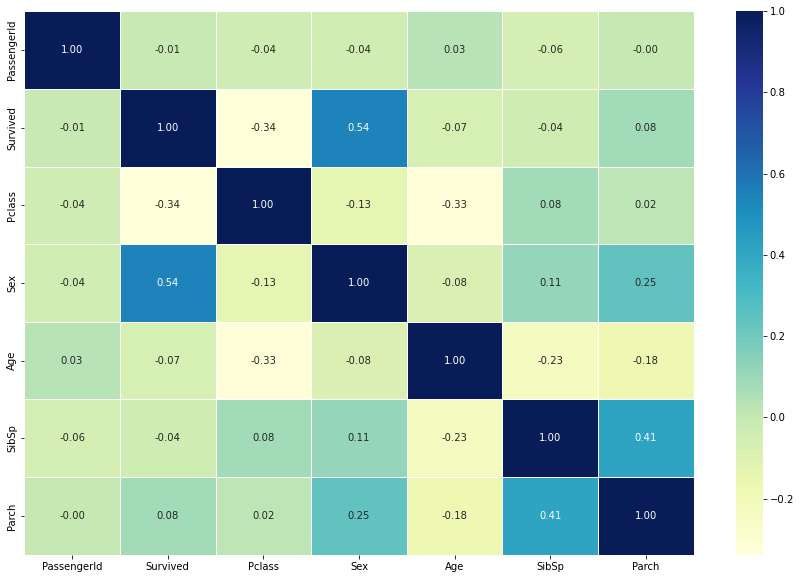

In [22]:
# Look at correlation of columns in a heatmap

corr_matrix = titanic.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt='.2f', 
                 cmap='YlGnBu');

In [23]:
#The correlation heatmap shows a positive correlation beween column 'Survived' and 'Sex'

In [24]:
# Compare positive correlated features with target ('Survived')
# 0=No   1=Yes  (Survived)

# 'Survived' v's 'Sex'

pd.crosstab(titanic.Survived, titanic.Sex)

Sex,0,1
Survived,,
0,468,81
1,109,233


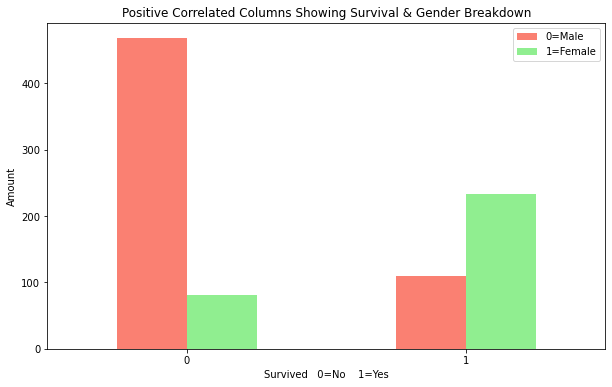

In [25]:
# Visual representation of positive correlated columns - 'Survived' & 'Sex'

pd.crosstab(titanic['Survived'], titanic['Sex']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightgreen'])
plt.xlabel('Survived   0=No    1=Yes')
plt.ylabel('Amount')
plt.xticks(rotation=1)
plt.legend(['0=Male', '1=Female'])
plt.title('Positive Correlated Columns Showing Survival & Gender Breakdown');

# The data shows that there is a correlation between the passengers surviving and the female gender.

In [46]:
# Amalyse the correlation of the different features.

corr_pairs = corr_matrix.unstack()
corr_pairs

PassengerId  PassengerId    1.000000
             Survived      -0.005007
             Pclass        -0.035144
             Sex           -0.042939
             Age            0.033207
             SibSp         -0.057527
             Parch         -0.001652
Survived     PassengerId   -0.005007
             Survived       1.000000
             Pclass        -0.338481
             Sex            0.543351
             Age           -0.069809
             SibSp         -0.035322
             Parch          0.081629
Pclass       PassengerId   -0.035144
             Survived      -0.338481
             Pclass         1.000000
             Sex           -0.131900
             Age           -0.331339
             SibSp          0.083081
             Parch          0.018443
Sex          PassengerId   -0.042939
             Survived       0.543351
             Pclass        -0.131900
             Sex            1.000000
             Age           -0.084153
             SibSp          0.114631
 

In [26]:
# Analyse the male passengers who did not survive. Analyse the lower passenger class and age <=30.

lower_class_males = titanic[(titanic['Sex']==0) & (titanic['Survived']==0) & (titanic['Pclass'] > 1) & (titanic['Age'] <= 30)]
lower_class_males.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.000000,1,0
5,6,0,3,0,29.699118,0,0
7,8,0,3,0,2.000000,3,1
12,13,0,3,0,20.000000,0,0
16,17,0,3,0,2.000000,4,1


In [27]:
lower_class_males.shape

(278, 7)

In [28]:
#Analyse columns 'Survived' and 'Pclass'

pd.crosstab(lower_class_males.Survived, lower_class_males.Pclass)

Pclass,2,3
Survived,,
0,49,229


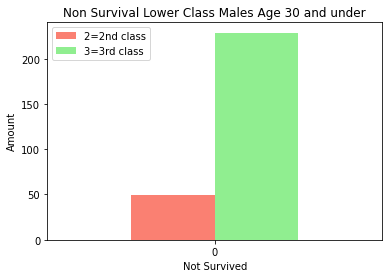

In [29]:
pd.crosstab(lower_class_males.Survived, lower_class_males.Pclass).plot(kind='bar', color=['salmon', 'lightgreen'])
plt.xticks(rotation=1)
plt.xlabel('Not Survived')
plt.ylabel('Amount')
plt.legend(['2=2nd class', '3=3rd class'])
plt.title('Non Survival Lower Class Males Age 30 and under');

In [30]:
# Analyse the male passengers who did not survive. Analyse the 1st class passenger class and aged <=30.

upper_class_males = titanic[(titanic['Sex']==0) & (titanic['Survived']==0) & (titanic['Pclass'] == 1) & (titanic['Age'] <= 30)]
upper_class_males.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
27,28,0,1,0,19.000000,3,2
34,35,0,1,0,28.000000,1,0
64,65,0,1,0,29.699118,0,0
83,84,0,1,0,28.000000,0,0
102,103,0,1,0,21.000000,0,1


In [31]:
upper_class_males.shape

(29, 7)

In [32]:
#Analyse columns 'Survived' and 'Pclass'

pd.crosstab(upper_class_males.Survived, upper_class_males.Pclass)

Pclass,1
Survived,
0,29


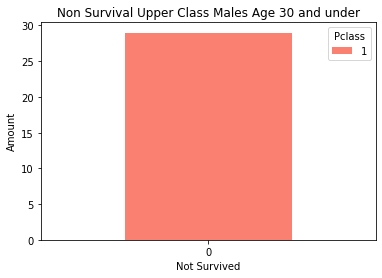

In [33]:
pd.crosstab(upper_class_males.Survived, upper_class_males.Pclass).plot(kind='bar', color=['salmon', 'lightgreen'])
plt.xticks(rotation=1)
plt.xlabel('Not Survived')
plt.ylabel('Amount')
#plt.legend(['2=2nd class', '3=3rd class'])
plt.title('Non Survival Upper Class Males Age 30 and under');

In [34]:
non_survival_males_under_thirty = titanic[(titanic['Sex']==0) & (titanic['Survived']==0) & (titanic['Age'] <= 30)]
non_survival_males_under_thirty.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.000000,1,0
5,6,0,3,0,29.699118,0,0
7,8,0,3,0,2.000000,3,1
12,13,0,3,0,20.000000,0,0
16,17,0,3,0,2.000000,4,1


In [35]:
pd.crosstab(non_survival_males_under_thirty.Survived, non_survival_males_under_thirty.Sex)

Sex,0
Survived,
0,307


In [36]:
pd.crosstab(titanic.Survived, titanic.Sex)

Sex,0,1
Survived,,
0,468,81
1,109,233


In [37]:
307/468

# 468 males did not survive. However, 66% of those were age 30 and below.

0.655982905982906

In [38]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

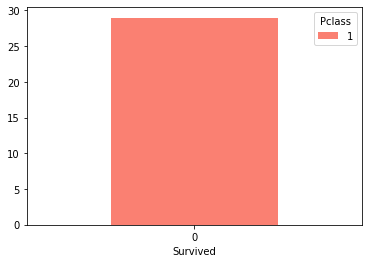

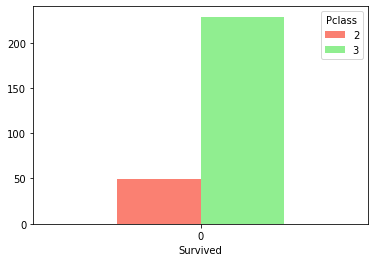

In [39]:
pd.crosstab(upper_class_males.Survived, upper_class_males.Pclass).plot(kind='bar', color=['salmon', 'lightgreen'])
plt.xticks(rotation=1)
pd.crosstab(lower_class_males.Survived, lower_class_males.Pclass).plot(kind='bar', color=['salmon', 'lightgreen'])
plt.xticks(rotation=1);

### Patterns Found In The Data From EDA

The data contains information on 577 males and 314 woman.
65% of the passengers were males and 35% of the passengers were woman.
A large proportion of the passengers were around 30 years of age.
The data shows a positive correlation between target column, 'Survived' and feature column 'Sex'.
The data shows that there is a positive correlation between the passengers surviving and the female gender.
Overall 549 passengers did not survive. 468 were male and 81 were woman. 

Males:

468 (85%) of male passengers did not survive.    
307 (66%) of the male passengers who did not survive were ages 30 and below.

278 (91%) of the non surviving male passengers aged 30 and below were 2nd and 3rd class passengers. 
82% were 3rd class passengers.
18% were 2nd class passengers.

29 (9%) of the non surviving male passengers aged 30 and below were 1st class passengers.